## Efficient Frontier

#### Industry_Portfolios.xlsx contains monthly nominal (net) returns for ten industry portfolios, expressed in percent. These returns cover the ten-year period from Jan 2004 through Dec 2013.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
industry_portfolio = pd.read_excel("Industry_Portfolios.xlsx", index_col = 0)

/Users/xiezijun/Documents/anaconda/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
# industry_portfolio = industry_portfolio.drop(["Date"],axis = 1)
industry_portfolio

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


### Q1.1 Estimate the vector of mean returns and the covariance matrix of returns for the ten industry portfolios.

In [4]:
R = industry_portfolio.mean()
MEAN = pd.DataFrame(R)
MEAN

,0
NoDur,0.902833
Durbl,0.733333
Manuf,1.012833
Enrgy,1.231167
HiTec,0.766250
Telcm,0.881417
Shops,0.916333
Hlth,0.783833
Utils,0.907167
Other,0.489083


In [5]:
V = industry_portfolio.cov()
V

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,11.193422,18.449666,14.104907,10.531341,12.922949,11.968078,10.170832,9.953112,7.866653,14.438409
Durbl,18.449666,69.920577,39.178097,27.019794,35.466652,27.490543,27.444731,16.824003,12.746136,39.361987
Manuf,14.104907,39.178097,28.198970,23.145380,24.618739,19.550150,17.622867,13.596447,11.440612,26.313423
Enrgy,10.531341,27.019794,23.145380,36.984933,19.267276,15.366817,11.297800,9.630327,14.027168,18.320469
HiTec,12.922949,35.466652,24.618739,19.267276,28.957220,18.708273,17.837115,13.254064,10.304187,23.855470
Telcm,11.968078,27.490543,19.550150,15.366817,18.708273,19.787227,14.169356,11.506599,10.991596,19.610836
Shops,10.170832,27.444731,17.622867,11.297800,17.837115,14.169356,16.759084,10.178849,6.694350,19.226524
Hlth,9.953112,16.824003,13.596447,9.630327,13.254064,11.506599,10.178849,14.342669,7.475036,14.864553
Utils,7.866653,12.746136,11.440612,14.027168,10.304187,10.991596,6.694350,7.475036,13.703052,9.992960
Other,14.438409,39.361987,26.313423,18.320469,23.855470,19.610836,19.226524,14.864553,9.992960,31.163771


In [6]:
len(V)

10

### Q1.2 Create a table showing the mean returns and standard deviation of returns for the ten industry portfolios.

In [7]:
std = industry_portfolio.std()
table = pd.DataFrame([R,std], index = ['mean_return','STD'])
table

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
mean_return,0.902833,0.733333,1.012833,1.231167,0.766250,0.881417,0.916333,0.783833,0.907167,0.489083
STD,3.345657,8.361852,5.310270,6.081524,5.381191,4.448284,4.093786,3.787172,3.701763,5.582452


### Q1.3 Plot the minimum-variance frontier (without the riskless asset) generated by the ten industry portfolios, with expected return on the vertical axis and standard deviation of return on the horizontal axis. This plot should cover the range from 0% to 2%, in increments of 0.1% (or less), on the vertical axis.

In [8]:
e = np.ones(10)
V_INV = np.linalg.inv(V)

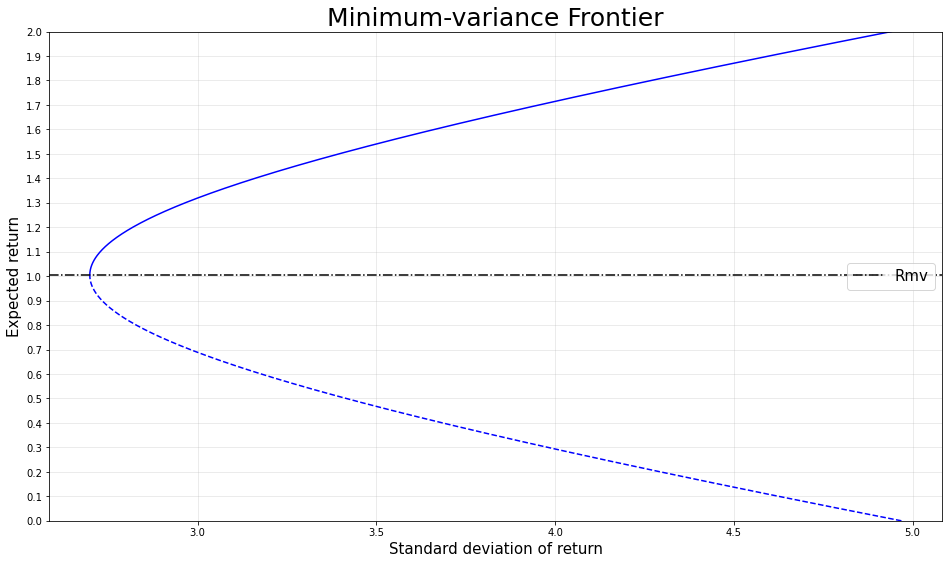

In [9]:
Alpha = R.T.dot(V_INV).dot(e)
Zeta = R.T.dot(V_INV).dot(R)
Delta = e.T.dot(V_INV).dot(e)
Rmv = Alpha/Delta

def STD_no_riskless(Rp):
    return ((1/Delta) + (Delta/(Zeta*Delta - Alpha**2))*(Rp - Rmv)**2)**0.5

def frontier_single(Rp):

    fig, ax = plt.subplots(figsize = (16,9))
    
    ax.plot(STD_no_riskless(Rp[Rp>=Rmv]), Rp[Rp>=Rmv], color = "blue")
    ax.plot(STD_no_riskless(Rp[Rp<=Rmv]), Rp[Rp<=Rmv], color = "blue", linestyle = '--')
    
    ax.axhline(y = Rmv, color ='black', linestyle = '-.', label ='Rmv')
    plt.legend(loc = "center right", fontsize = 15)
    
    ax.set_title("Minimum-variance Frontier", size = 25)
    ax.set_xlabel("Standard deviation of return", fontsize = 15)
    ax.set_ylabel("Expected return", fontsize = 15)    
    ax.set_yticks(np.linspace(0, 2, 21))
    ax.set_ylim(0,2)
    ax.grid(alpha = 0.3)

    plt.show()
    return

Rp = np.linspace(0, 2, 1000)
frontier_single(Rp)

### Q1.4 Briefly explain the economic significance and relevance of the minimum-variance frontier to an investor.

> Minimum Variance frontier is the technical way of representing a low-risk portfolio. It carries low volatility as it correlates to your expected return (you’re not assuming greater risk than is necessary). It helps investors understand the potential risks and returns in their portfolios and analyze how they compare to the optimal set of portfolios that are considered to be efficient. Doing so helps investors to accordingly change their investing strategies by understanding the level of risk that pertains to each portfolio.

* Minimum-variance frontier consists of portfolios with least risk for specified mean return, so no portfolios exist to the left of this frontier.

### Now suppose that the risk-free rate is 0.13% per month.

### Q2.1 Plot the efficient frontier (with the riskless asset) on the same plot as the minimum-variance frontier generated by the ten industry portfolios.

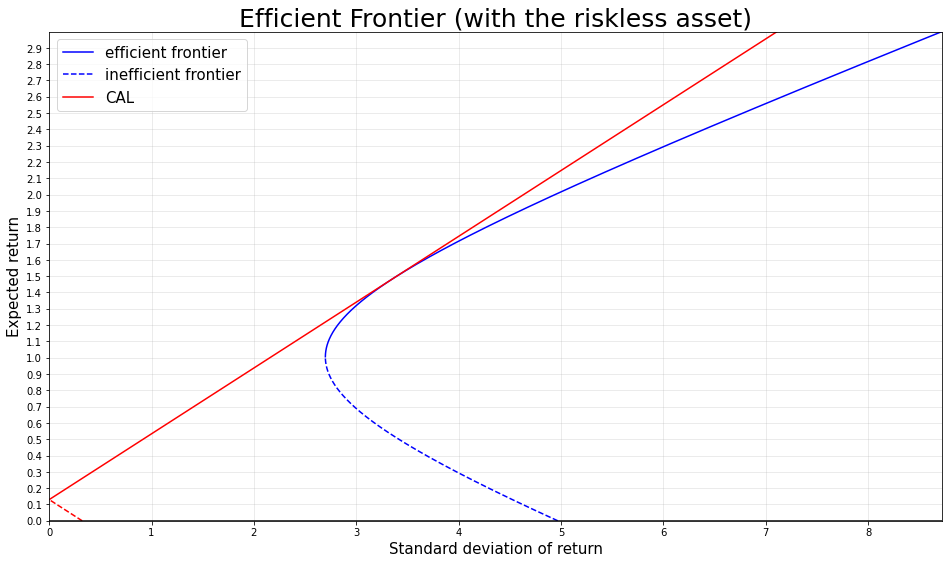

In [10]:
Rf = 0.13

def STD_with_riskless(Rp, Rf):
    return np.piecewise(Rp,
                        [Rp >= Rf, Rp < Rf],
                        [lambda Rp: ((Rp -Rf)**2 / (Zeta - 2*Alpha*Rf + Delta*Rf**2))**0.5,
                          lambda Rp: ((Rf -Rp)**2 / (Zeta - 2*Alpha*Rf + Delta*Rf**2))**0.5])

def Rtg(Rf):
    return (Alpha*Rf - Zeta) / (Delta*Rf - Alpha)

def frontier_with_line(Rp, Rf):    
    fig, ax = plt.subplots(figsize = (16,9))
    
    ax.plot(STD_no_riskless(Rp[Rp>=Rmv]), Rp[Rp>=Rmv], color = "blue", label ='efficient frontier')
    ax.plot(STD_no_riskless(Rp[Rp<=Rmv]), Rp[Rp<=Rmv], color = "blue", label ='inefficient frontier', linestyle = '--')
    
    ax.plot(STD_with_riskless(Rp[Rp>=Rf], Rf), Rp[Rp>=Rf], color = 'red', label ='CAL')
#     ax.plot(STD_with_riskless(Rp[Rp<=Rf], Rf), Rp[Rp<=Rf], color = 'red', linestyle = '--')
    
    plt.legend(loc = "upper left", fontsize = 15)
    ax.axhline(y = 0, color ='black')
    ax.set_title("Efficient Frontier (with the riskless asset)", size = 25)
    ax.set_xlabel("Standard deviation of return", fontsize = 15)
    ax.set_ylabel("Expected return", fontsize = 15)    
    ax.set_yticks(np.arange(Rp[0], Rp[-1], 0.1))
    ax.set_xlim(0, STD_no_riskless(Rp[-1]))
    ax.set_ylim(Rp[0], Rp[-1])
    ax.grid(alpha = 0.3)

    plt.show()
    return

Rp = np.linspace(0, 3, 1000)
frontier_with_line(Rp, Rf)

### Q2.2 Briefly explain the economic significance and relevance of the efficient frontier to an investor. (The two frontiers will intersect at single point: the tangency portfolio.)

> The efficient frontier graphically depicts the tremendous benefit of diversification. The curvature of the line is integral in revealing how diversification improves a portfolio's risk / reward profile. It also reveals that there is a diminishing marginal return to risk. In other words, adding more risk to a portfolio does not gain an equal amount of return. Optimal portfolios that comprise the efficient frontier tend to have a higher degree of diversification than the sub-optimal ones, which are typically less diversified.

> A risk-seeking investor would select investments that lie on the right end of the efficient frontier which is populated with securities that are expected to have a high degree of risk coupled with high potential returns. Conversely, a risk-averse investor would select investments that lie on the left end of the efficient frontier where securities with lower risk but lower return reside.

* Efficient frontier consists of portfolios with highest mean return for specified level of risk, so risk-averse investor must invest in portfolio on this frontier in order to maximise expected utility (of wealth).

### Q2.3 Calculate the Sharpe ratio for the tangency portfolio, and also the tangency portfolio weights for the ten industry portfolios.

In [11]:
def sharp_ratio(Rf):
    return (Zeta - 2*Alpha*Rf + Delta*Rf**2)**0.5

In [12]:
def weights(Rf):
    Lambda = (Rtg(Rf)-Rf) / (Zeta -2*Alpha*Rf + Delta*Rf**2)
    return Lambda*V_INV.dot(R - Rf*e)

def weights2(Rf):
    a = (Zeta*V_INV.dot(e) - Alpha*V_INV.dot(R)) / (Zeta*Delta - Alpha**2)
    b = (Delta*V_INV.dot(R) - Alpha*V_INV.dot(e)) / (Zeta*Delta - Alpha**2)
    return a + b * Rtg(Rf)

In [13]:
print("Sharp Ratio = ", sharp_ratio(Rf))

Weights_table = pd.DataFrame(MEAN.reset_index().iloc[:,0])
Weights_table["Weights"] = weights(Rf)
Weights_table["Weights2"] = weights2(Rf)
Weights_table

Sharp Ratio =  0.4035655993495099


,index,Weights,Weights2
0,NoDur,0.567972,0.567972
1,Durbl,-0.214073,-0.214073
2,Manuf,0.714105,0.714105
3,Enrgy,0.104087,0.104087
4,HiTec,-0.363438,-0.363438
5,Telcm,-0.095463,-0.095463
6,Shops,0.991647,0.991647
7,Hlth,0.075570,0.075570
8,Utils,0.132643,0.132643
9,Other,-0.913051,-0.913051


### → Briefly explain the economic significance and relevance of the tangency portfolio to an investor.

> The tangency portfolio consists risk assets position without risk-free asset and has the highest sharp ratio among all risky portfolios.

* Tangency portfolio has the highest possible Sharpe ratio.